In [1]:
import pandas
import json
import copy
from ipywidgets import interact
pandas.set_option('display.max_rows', None)

config = json.load(open("../config.json", newline='\n'))

result = pandas.read_json("../result.json")

result_right = result["right"]
result_right_total = result_right["all"]
right_subs = config["sub_groups"]["right"]
total_right_author_count = result_right_total[0]
total_right_comment_count = result_right_total[1]

result_left = result["left"]
result_left_total = result_left["all"]
left_subs = config["sub_groups"]["left"]
total_left_author_count = result_left_total[0]
total_left_comment_count = result_left_total[1]

raw_comments_per_sub = {
    "subreddit": [],
    "author_count": [],
    "comment_count": [],
    "author_percentage": [],
    "comment_percentage": [],
}

In [2]:
result.head(10)

,right,left
all,"[2228, 2819355]","[35587, 22383062]"
100yearsago,"[7, 65]","[86, 534]"
1200isplenty,"[11, 29]","[114, 534]"
1911,"[8, 40]","[70, 432]"
195,"[7, 21]","[66, 186]"
1970s,"[1, 1]","[1, 1]"
2007scape,"[20, 3649]","[260, 9788]"
2spooky4me,"[2, 8]","[16, 44]"
3DS,"[29, 805]","[551, 6616]"
3Dprinting,"[23, 85]","[324, 3835]"


In [3]:
result_right_in_right_subs = result_right[result_right.index.isin(right_subs)]
print(result_right_in_right_subs.to_string())

Conservative    [2064, 64630]
Republican        [505, 6627]
The_Donald            [6, 34]
donaldtrump               NaN


In [4]:
result_left_in_left_subs = result_left[result_left.index.isin(left_subs)]
print(result_left_in_left_subs.to_string())

Liberal                    [1133, 9042]
SandersForPresident      [9557, 168583]
democrats                   [724, 6854]
politics               [32564, 1114634]
progressive               [1680, 13755]
socialism                 [2812, 72726]
JoeBiden                         [1, 1]


In [5]:
total_comments_left_in_left_subs = 0
for sub, sub_author_tuple in result_left_in_left_subs.items():
    if type(sub_author_tuple) is not list:
        continue
    total_comments_left_in_left_subs += sub_author_tuple[1]

total_comments_right_in_right_subs = 0
for sub, sub_author_tuple in result_right_in_right_subs.items():
    if type(sub_author_tuple) is not list:
        continue
    total_comments_right_in_right_subs += sub_author_tuple[1]
    
total_comments_right_in_other_subs = result_right["all"][1] - total_comments_right_in_right_subs
total_comments_left_in_other_subs = result_left["all"][1] - total_comments_left_in_left_subs

print(f"total left comments in left subs by relevant left authors : {total_comments_left_in_left_subs}")
print(f"total left comments in other subs by relevant left authors: {total_comments_left_in_other_subs}")

print(f"total right comments in right subs by relevant right authors: {total_comments_right_in_right_subs}")
print(f"total right comments in other subs by relevant right authors: {total_comments_right_in_other_subs}")

total left comments in left subs by relevant left authors : 1385595
total left comments in other subs by relevant left authors: 20997467
total right comments in right subs by relevant right authors: 71291
total right comments in other subs by relevant right authors: 2748064


Text(0.5, 1.0, 'Comments by relevant left authors')

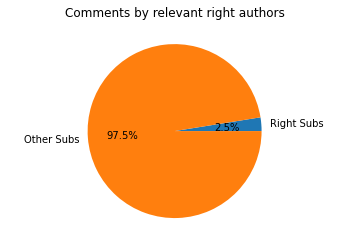

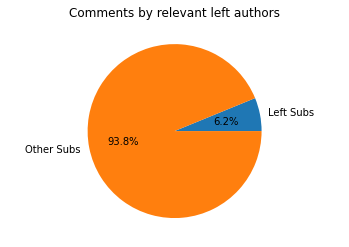

In [6]:
import matplotlib.pyplot as plt

labels = ['Right Subs', 'Other Subs']
sizes = [total_comments_right_in_right_subs, total_comments_right_in_other_subs]
fig, ax = plt.subplots()
ax.axis('equal')
ax.pie(sizes, labels=labels, autopct='%1.1f%%')  
ax.set_title('Comments by relevant right authors')

labels = ['Left Subs', 'Other Subs']
sizes = [total_comments_left_in_left_subs, total_comments_left_in_other_subs]
fig, ax = plt.subplots()
ax.axis('equal')
ax.pie(sizes, labels=labels, autopct='%1.1f%%')  
ax.set_title('Comments by relevant left authors')

In [7]:
raw_left_comments_per_sub = copy.deepcopy(raw_comments_per_sub)

for sub, sub_author_tuple in result_left.items():
    if type(sub_author_tuple) is not list or sub == "all":
        continue
    raw_left_comments_per_sub["subreddit"].append(sub)
    raw_left_comments_per_sub["author_count"].append(sub_author_tuple[0])
    raw_left_comments_per_sub["comment_count"].append(sub_author_tuple[1])
    raw_left_comments_per_sub["author_percentage"].append(float("{:.2f}".format(sub_author_tuple[0] / total_left_author_count * 100)))
    raw_left_comments_per_sub["comment_percentage"].append(float("{:.2f}".format(sub_author_tuple[1] / total_left_comment_count * 100)))

columns = ['subreddit', 'author_percentage', 'comment_percentage', 'author_count', 'comment_count']
left_comments_per_sub = pandas.DataFrame(
    raw_left_comments_per_sub,
    columns=columns
)

columns = ['author_percentage', 'comment_percentage']
@interact
def sort(column=columns, order={"ascending": True, "descending": False}, x=(5, 50, 1)):
    return left_comments_per_sub.sort_values(
        ascending=order,
        by=column
    ).head(x).reset_index(drop=True)

interactive(children=(Dropdown(description='column', options=('author_percentage', 'comment_percentage'), valu…

In [8]:
raw_right_comments_per_sub = copy.deepcopy(raw_comments_per_sub)

for sub, sub_author_tuple in result_right.items():
    if type(sub_author_tuple) is not list or sub == "all":
        continue
    raw_right_comments_per_sub["subreddit"].append(sub)
    raw_right_comments_per_sub["author_count"].append(sub_author_tuple[0])
    raw_right_comments_per_sub["comment_count"].append(sub_author_tuple[1])
    raw_right_comments_per_sub["author_percentage"].append(float("{:.2f}".format(sub_author_tuple[0] / total_right_author_count * 100)))
    raw_right_comments_per_sub["comment_percentage"].append(float("{:.2f}".format(sub_author_tuple[1] / total_right_comment_count * 100)))

columns = ['subreddit', 'author_percentage', 'comment_percentage', 'author_count', 'comment_count']
right_comments_per_sub = pandas.DataFrame(
    raw_right_comments_per_sub,
    columns=columns
)

columns = ['author_percentage', 'comment_percentage']
@interact
def sort(column=columns, order={"ascending": True, "descending": False}, x=(5, 50, 1)):
    right = right_comments_per_sub.sort_values(
        ascending=order,
        by=column
    ).head(x).reset_index(drop=True)
    
    return right

interactive(children=(Dropdown(description='column', options=('author_percentage', 'comment_percentage'), valu…

In [9]:
columns = ['author_percentage', 'comment_percentage']
@interact
def sort(column=columns, order={"ascending": True, "descending": False}, x=(5, 50, 1)):
    left = left_comments_per_sub.sort_values(
        ascending=order,
        by=column
    ).head(x).reset_index(drop=True)
    del left["author_count"]
    del left["comment_count"]
    left.rename(
        {
            'subreddit': 'left sub',
            'author_percentage': 'left author',
            'comment_percentage': 'left comment'
        }, axis=1, inplace=True)


    right = right_comments_per_sub.sort_values(
        ascending=order,
        by=column
    ).head(x).reset_index(drop=True)
    del right["author_count"]
    del right["comment_count"]
    right.rename(
        {
            'subreddit': 'right sub',
            'author_percentage': 'right author',
            'comment_percentage': 'right comment'
        }, axis=1, inplace=True)
    
    return pandas.concat([left, right], axis=1)    

interactive(children=(Dropdown(description='column', options=('author_percentage', 'comment_percentage'), valu…

total count: 37386
right count: 14881
left count: 37014
only right count: 372
only left count: 22505
intersection: 14509


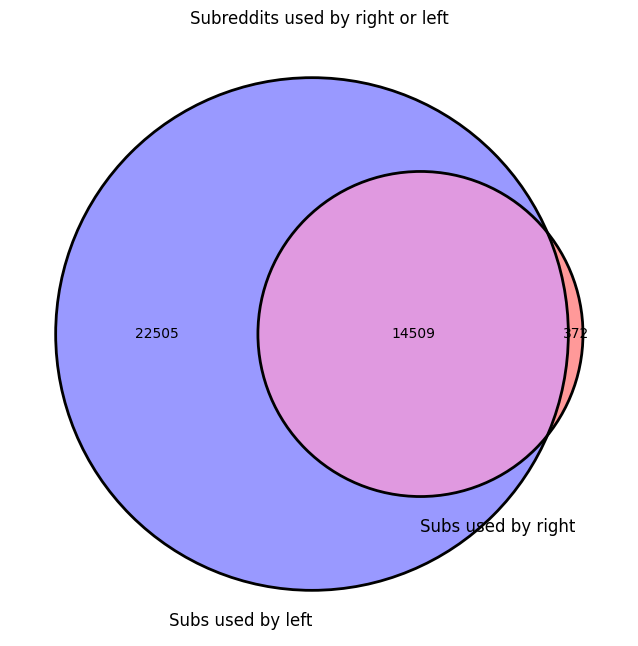

In [10]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

all_unique_subs = pandas.concat([left_comments_per_sub, right_comments_per_sub], ignore_index=True).subreddit.unique()
right_unique_subs = right_comments_per_sub.subreddit.unique()
left_unique_subs = left_comments_per_sub.subreddit.unique()

total_sub_count = len(all_unique_subs)
right_sub_count = len(right_unique_subs)
left_sub_count = len(left_unique_subs)

print(f"total count: {total_sub_count}")
print(f"right count: {right_sub_count}")
print(f"left count: {left_sub_count}")

only_right = total_sub_count - left_sub_count
only_left = total_sub_count - right_sub_count

print(f"only right count: {only_right}")
print(f"only left count: {only_left}")

intersection_right_left = (total_sub_count - only_right) - only_left

print(f"intersection: {intersection_right_left}")

plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.title("Subreddits used by right or left");
venn2(
    subsets = (
        only_left,
        only_right,
        intersection_right_left
    ),
    set_labels = (
        'Subs used by left',
        'Subs used by right'
    ),
    set_colors=(
        'blue',
        'red'
    )
)
venn2_circles(subsets = (only_left, only_right, intersection_right_left));

